# CYGNSS L2 Python Module Demonstration

<hr>
<i>Author Info</i><br>
Timothy Lang<br>
timothy.j.lang@nasa.gov
<hr>

### Introduction

Welcome to the CYGNSS L2 Wind Python Module Demonstration. For the time being, I am calling this module `pygnss`. In addition to the `pygnss` source code and this notebook, I am also supplying the `cmap_map` module. This provides the ability to lighten or "wash out" a color table, which is useful when overplotting CYGNSS winds on top of the background winds. Put it in your `PYTHONPATH` along with `pygnss`.

OK, first things first, let's import everything we need and prep our datasets.

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pygnss
# cmap_map is also part of SingleDop (https://github.com/nasa/SingleDop)
from singledop.cmap_map import lighten_cmap
# from cmap_map import lighten_cmap
%matplotlib inline

The following cell will need to be updated by you. Input refers to the model or observed winds you ingested into the CYGNSS E2ES. Since the E2ES expects input data to be formatted a certain way, I exploited this to create Python objects to ingest and display these data separate from or alongside the synthetic CYGNSS data.

Output refers to the Level 2 output wind files created by the E2ES.

In the present example, my input data came from a limited 9-km resolution WRF domain, featuring a simulation of the atmosphere above the Indian Ocean during 11/25/2011. Off the coast of India was the developing Tropical Storm 05A. The CYGNSS E2ES was run on a day's worth of WRF background simulation, with E2ES using a time step of 1 min. This is greatly decimated compared to CYGNSS's native resolution of 1 second. 

In [2]:
input_dir = '/Users/tjlang/Documents/CYGNSS/E2ES/datafiles/winds/DYNAMO_WRF/'
input_files = sorted(glob.glob(input_dir+'CYGNSS_Sim_wrfout_d01_2011-11-25_*.nc'))
output_dir = '/Users/tjlang/Documents/CYGNSS/E2ES/run_geos5/output/control/'
output_L2_files = sorted(glob.glob(output_dir+'cyg?.L2.20060218-S213000-E212959.e2e.nc'))
print('E2ES Inputs', [os.path.basename(filen) for filen in input_files])
print()
print('E2ES Outputs', [os.path.basename(filen) for filen in output_L2_files])

E2ES Inputs ['CYGNSS_Sim_wrfout_d01_2011-11-25_00:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_01:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_02:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_03:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_04:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_05:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_06:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_07:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_08:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_09:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_10:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_11:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_12:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_13:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_14:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_15:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_16:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_17:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_18:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_19:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011

### Data Plotting

OK, ingesting and plotting the E2ES output data is as simple as 3 lines of code (actually, this can be reduced to two lines, as we'll see later).

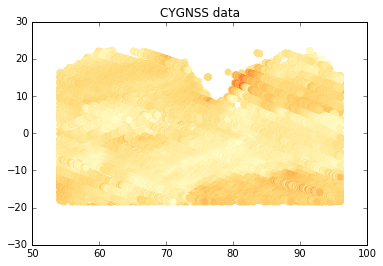

In [3]:
merged_data = pygnss.CygnssMultiSat(output_L2_files)
display = pygnss.CygnssL2WindDisplay(merged_data)
display.specular_plot()

Every specular point is a dot, with color corresponding to wind speed. Well, the above plot is a start. Why don't we spruce it up a bit though?

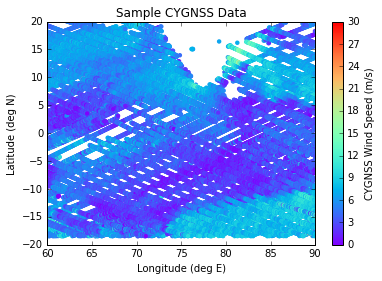

In [4]:
display.specular_plot(colorbar_flag=True, axis_label_flag=True, 
                      title='Sample CYGNSS Data', ms=20,
                      cmap='rainbow', 
                      latrange=[-20, 20], lonrange=[60, 90])

So the `specular_plot` method accepts keywords to adjust axes, title, colorbars/maps, marker size, time period (via the `indices` keyword), etc. See the method's docstring in the source code for more info.

How about comparing synthetic CYGNSS versus "truth"? All it takes is one line of code to get a quick histogram.

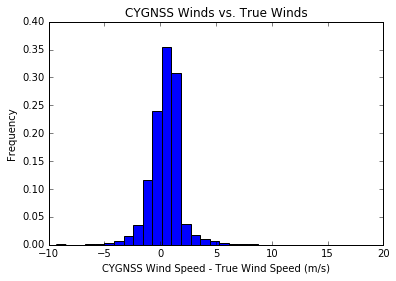

In [9]:
display.histogram_plot(bins=30, axis_label_flag=True)

You can also do a 2D histogram plot. Both histogram options including the ability to threshold on `RangeCorrectedGain` values via the `gain` keyword. There are lots of other keyword options too, for customizing the figure.

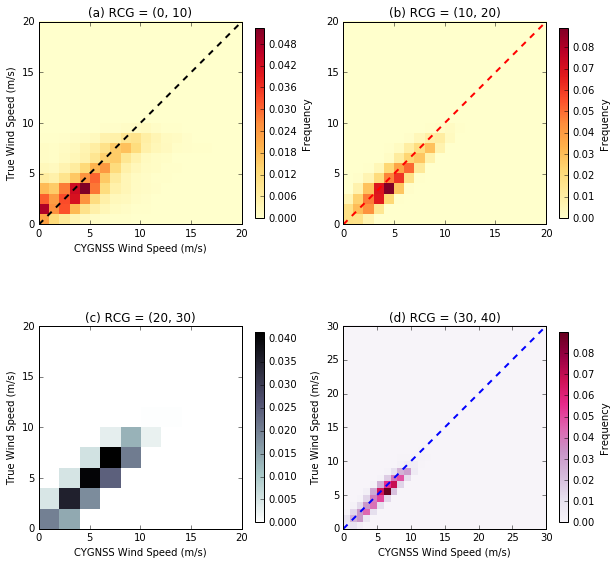

In [10]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 10))
display.hist2d_plot(gain=[0, 10], cmap='YlOrRd', add_line=True,
                    line_color='k', ax=ax1, title='(a) RCG = (0, 10)',
                    axis_label_flag=True)
display.hist2d_plot(gain=[10, 20], ax=ax2, title='(b) RCG = (10, 20)')
display.hist2d_plot(gain=[20, 30], cmap='bone_r', add_line=False,
                    ax=ax3, title='(c) RCG = (20, 30)', axis_label_flag=True,
                    colorbar_label_flag=False, bins=10)
display.hist2d_plot(gain=[30, 40], bins=30, range=(0, 30), cmap='PuRd',
                    add_line=True, line_color='b', ax=ax4,
                    axis_label_flag=True, title='(d) RCG = (30, 40)')

We can also retrieve individual tracks of specular points, which are formed by reflections between one particular GPS satellite and a CYGNSS observatory. Simple box filtering of the wind speeds is also supported. The following example identifies all individual tracks and filters wind speeds along the tracks using a 5-pt filter.

In [7]:
trl = pygnss.get_tracks(display, verbose=True, filter=True, window=5)

CYGNSS satellite 0
CYGNSS satellite 1
CYGNSS satellite 2
CYGNSS satellite 3
CYGNSS satellite 4
CYGNSS satellite 5
CYGNSS satellite 6
CYGNSS satellite 7


Now let's plot up a track and see how the raw and filtered wind speeds compare to truth. Filtering can greatly improve the error characteristics of CYGNSS data.

In [12]:
trl[200].tws

array([ 8.36370659,  8.43786621,  8.43786621,  8.46778107,  8.46021843,
        8.39745712,  8.39745712,  8.31082726,  8.20780373,  8.05972385,
        7.9914794 ,  7.92768288,  7.88721752,  7.77455282,  7.74293327,
        7.74293327,  7.6335268 ,  7.57974052,  7.4144721 ,  7.4144721 ,
        7.26799726,  7.18936777,  7.25926828,  7.32882643,  7.38971949,
        7.46328831,  7.59553957,  7.62947512,  7.7377882 ,  7.70829391,
        7.64108467,  7.59677505,  7.59677505,  7.64461517,  7.60200977,
        7.69516897,  7.70339394,  7.7952652 ,  7.81533575,  8.01097584,
        8.13164139,  8.22427654,  8.28055191,  8.54652405,  8.48433685,
        8.50770855,  8.34041214,  8.14166164,  7.83763266,  7.83763266,
        7.5686512 ,  7.55596256,  7.55605412,  7.50101852,  7.53307819,
        7.42727375,  7.62732697,  7.62812471,  7.99033213,  7.95310307,
        7.98896027,  7.82164288,  7.91002941,  7.77885485,  7.76468134,
        7.72941256,  7.72941256,  7.76021528,  7.67701387,  7.64

//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


(array([ 732361.07805556,  732361.07840278,  732361.07875   ,
         732361.07909722,  732361.07944444,  732361.07979167,
         732361.08013889,  732361.08048611,  732361.08083333]),
 <a list of 9 Text xticklabel objects>)

//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise 

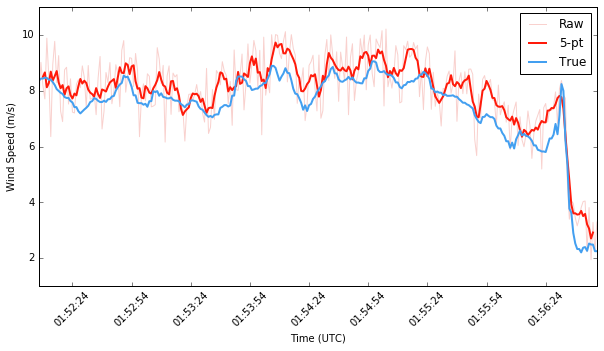

In [11]:
import matplotlib.dates as mdates
ind = 200
fig = plt.figure(figsize=(10, 5))
plt.plot(trl[ind].datetimes, trl[ind].ws, label='Raw', color='#F9D1CE')
plt.plot(trl[ind].datetimes[2:-2], trl[ind].fws, label='5-pt', color='#FF1A0A', lw=2)
plt.plot(trl[ind].datetimes, trl[ind].tws, label='True', color='#439FF0', lw=2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Time (UTC)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

### The structure of PyGNSS objects

So currently `pygnss` supports simple ways to get basic geospatial and statistical plots of the L2 wind data, to enable rapid analysis of E2ES output. But how does it actually work? Well, the design is object-oriented and modular, to make it easy to develop new functionality. 

The core object is `NetcdfFile`, a simplified interface to ingest a netCDF file and obtain all of its variables in an organized manner. Then `CygnssSingleSat`, a child class of `NetcdfFile`, provides the actual interface to an individual satellite's data file. The `CygnssMultiSat` object makes use of multiple `CygnssSingleSat` objects to ingest the entire constellation's data and organize them appropriately. Finally, the `CygnssL2WindDisplay` object accepts either `CygnssSingleSat` or `CygnssMultiSat` objects (or a list of files from which such objects will be pulled) and gives access to the plotting routines seen above.

Let's get a better sense of how this works by investigating a single satellite's data.

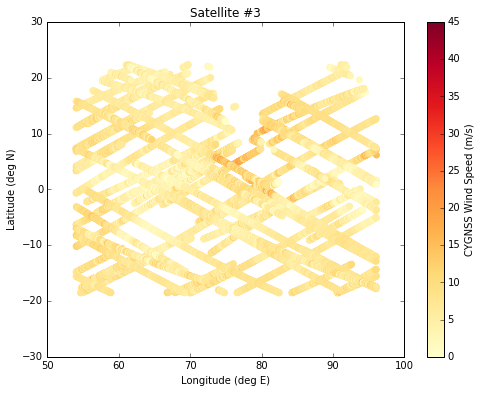

In [9]:
display = pygnss.CygnssL2WindDisplay(output_L2_files[2], number=8)
fig = plt.figure(figsize=(8, 6))
display.specular_plot(title='Satellite #3', colorbar_flag=True, axis_label_flag=True, vmax=45)

So, if all you want is a plot, we can directly ingest into a `CygnssL2WindDisplay` object an individual satellite's file, and the number keyword defines what number of specular points per time step to compare against the satellite object's `RangeCorrectedGain` attribute. The default is to take the specular points for the top-4 gain values (same as real-life CYGNSS). This is used to help mask out extra specular points. In addition, masking on bad or missing data is also employed when plotting the data.

Currently, land/ocean masking is not employed when plotting the data in this basic manner. That feature will be added soon. However, land can be easily masked when doing a `Basemap` plot, discussed later.

OK, enough plotting, what is actually in these objects?

In [10]:
sat3 = pygnss.CygnssSingleSat(output_L2_files[2])
print(sat3.variable_list)

[u'Year', u'Month', u'Day', u'Hour', u'Minute', u'Second', u'GpsID', u'Latitude', u'Longitude', u'WindSpeed', u'TruthWindSpeed', u'ErrorStdDev', u'WindDirection', u'L1bDDMAObservable', u'L1bLESObservable', u'RangeCorrectedGain', u'IncidenceAngle', u'Sigma0', u'MSS', u'SeaSurfaceTemperature']


In [11]:
print(np.shape(sat3.WindSpeed))

(86300, 15)


So all the stuff in the L2 wind files is there, and the shape for many key variables like `WindSpeed` is (number of time steps, number of possible specular points = 15). Masking is simply used later to cut that down to 4 specular points per time step, or whatever the end user wants.

In [12]:
sat3.get_gain_mask(number=8)
print(sat3.variable_list)

[u'Year', u'Month', u'Day', u'Hour', u'Minute', u'Second', u'GpsID', u'Latitude', u'Longitude', u'WindSpeed', u'TruthWindSpeed', u'ErrorStdDev', u'WindDirection', u'L1bDDMAObservable', u'L1bLESObservable', u'RangeCorrectedGain', u'IncidenceAngle', u'Sigma0', u'MSS', u'SeaSurfaceTemperature', 'GoodData']


In [13]:
index = 1000
print(sat3.GoodData[index], sat3.RangeCorrectedGain[index])

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In this case, the top-8 specular points in terms of `RangeCorrectedGain` at time step = index get `GoodData` flags = 1. If you just ingest a file using `CygnssSingleSat`, the gain mask (the `GoodData` attribute) is not applied automatically. However, the `CygnssL2WindDisplay` and `CygnssMultiSat` objects will set this automatically based on user input (or lack thereof), so that the plotting routines will know what to plot. 

Indeed, the `CygnssMultiSat` object has everything in `CygnssSingleSat` too, but consolidated to fit data from all the satellites into one object. It even holds all the individual `CygnssSingleSat` objects used to construct it within its `satellites` attribute.

In [14]:
print(merged_data.variable_list)
print(np.shape(merged_data.WindSpeed))

[u'Year', u'Month', u'Day', u'Hour', u'Minute', u'Second', u'GpsID', u'Latitude', u'Longitude', u'WindSpeed', u'TruthWindSpeed', u'ErrorStdDev', u'WindDirection', u'L1bDDMAObservable', u'L1bLESObservable', u'RangeCorrectedGain', u'IncidenceAngle', u'Sigma0', u'MSS', u'SeaSurfaceTemperature', 'GoodData']
(86300, 120)


In [15]:
print(merged_data.satellites)

[<pygnss.CygnssSingleSat object at 0x106384610>, <pygnss.CygnssSingleSat object at 0x1063847d0>, <pygnss.CygnssSingleSat object at 0x106384890>, <pygnss.CygnssSingleSat object at 0x1063848d0>, <pygnss.CygnssSingleSat object at 0x1063846d0>, <pygnss.CygnssSingleSat object at 0x106384910>, <pygnss.CygnssSingleSat object at 0x106384990>, <pygnss.CygnssSingleSat object at 0x106384950>]


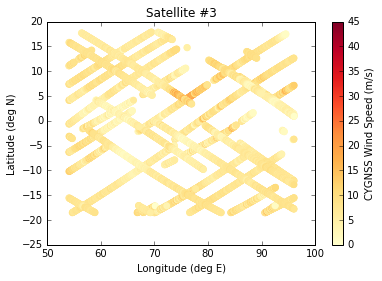

In [16]:
display = pygnss.CygnssL2WindDisplay(merged_data.satellites[2])
display.specular_plot(title='Satellite #3', colorbar_flag=True,
                      axis_label_flag=True, vmax=45)

And now we basically recreated the figure from above, working from the `merged_data` object itself, although with only the top-4 specular points in terms of `RangeCorrectedGain` plotted (the default when we created merged_data several cells back). 

### Plotting E2ES input data along with CYGNSS on a Basemap

The `pygnss` module also can work with the E2ES input data files. The key objects here are `E2esInputData` (for interfacing with the data file) and `InputWindDisplay` (for helping plot the data).

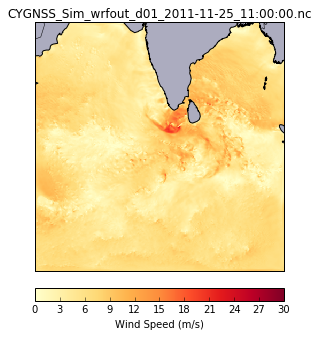

In [17]:
input_data = pygnss.E2esInputData(input_files[11])
fig = plt.figure(figsize=(5,5))
input_display = pygnss.InputWindDisplay(input_data)
input_display.basemap_plot(title=os.path.basename(input_files[11]))

Note the output `Basemap` object. This is by default returned automatically by the `basemap_plot` method. We can take advantage of this to bring in the CYGNSS data, like so:

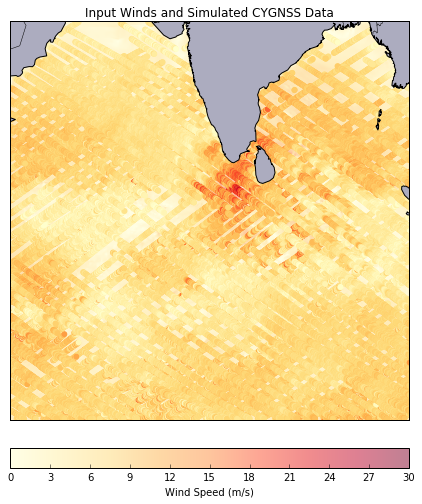

In [18]:
lgist = lighten_cmap(plt.cm.get_cmap('YlOrRd'))
fig = plt.figure(figsize=(8, 8))
input_display = pygnss.InputWindDisplay(input_files[11])
m = input_display.basemap_plot(title='Input Winds and Simulated CYGNSS Data', cmap=lgist)
display = pygnss.CygnssL2WindDisplay(output_L2_files)
display.specular_plot(colorbar_flag=False, axis_label_flag=False, title_flag=False,
                      basemap=m, edge_flag=False, cmap='YlOrRd', ms=35)

Note how `InputWindDisplay` can accept files directly, bypassing the `E2esInputData` step. I also lightened the base colormap so the CYGNSS specular points show up a bit better.

And you can plot the data for a single satellite, limit by time, color in the edges of the specular points, etc.

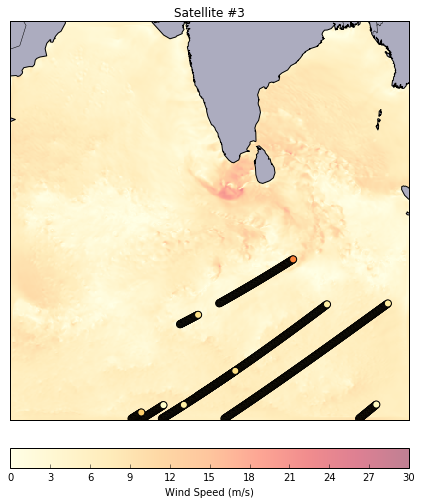

In [19]:
fig = plt.figure(figsize=(8,8))
m = input_display.basemap_plot(title='Satellite #3', cmap=lgist)
ss_display = pygnss.CygnssL2WindDisplay(merged_data.satellites[2])
ss_display.specular_plot(cmap='YlOrRd', colorbar_flag=False, edge_flag=True, 
                         title_flag=False, basemap=m, indices=[5000, 10000])

You can use a different `Basemap` than the one created by `InputWindDisplay.basemap_plot` to plot CYGNSS data, if you wish. The `specular_plot` syntax above would be the same. Below is an example of how to modify the `Basemap` after the fact.

{-15: ([<matplotlib.lines.Line2D at 0x1414f1f50>],
  [<matplotlib.text.Text at 0x47518f150>]),
 -10: ([<matplotlib.lines.Line2D at 0x47517ac90>],
  [<matplotlib.text.Text at 0x47518f090>]),
 -5: ([<matplotlib.lines.Line2D at 0x47517a990>],
  [<matplotlib.text.Text at 0x475184d90>]),
 0: ([<matplotlib.lines.Line2D at 0x4751a4150>],
  [<matplotlib.text.Text at 0x4751844d0>]),
 5: ([<matplotlib.lines.Line2D at 0x4751a4690>],
  [<matplotlib.text.Text at 0x475184a50>]),
 10: ([<matplotlib.lines.Line2D at 0x17c04e850>],
  [<matplotlib.text.Text at 0x473b63190>]),
 15: ([<matplotlib.lines.Line2D at 0x17c04ead0>],
  [<matplotlib.text.Text at 0x473b63550>]),
 20: ([<matplotlib.lines.Line2D at 0x47518ff90>],
  [<matplotlib.text.Text at 0x473b637d0>])}

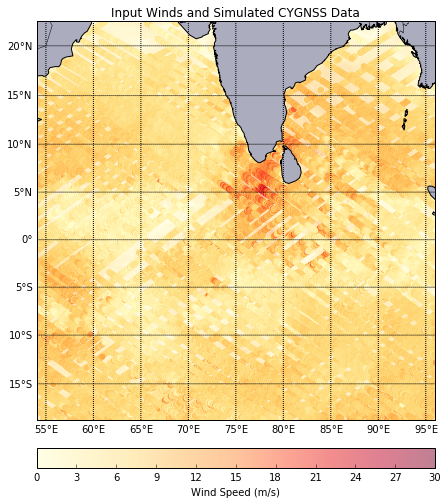

In [20]:
lgist = lighten_cmap(plt.cm.get_cmap('YlOrRd'))
fig = plt.figure(figsize=(8, 8))
input_display = pygnss.InputWindDisplay(input_files[11])
m = input_display.basemap_plot(title='Input Winds and Simulated CYGNSS Data', cmap=lgist,
                               return_flag=True)
display = pygnss.CygnssL2WindDisplay(output_L2_files)
display.specular_plot(
    colorbar_flag=False, axis_label_flag=False, title_flag=False,
    basemap=m, edge_flag=False, cmap='YlOrRd', ms=35)
m.drawmeridians(np.arange(-180, 180, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(-90, 90, 5), labels=[1, 0, 0, 0])

And that's about it. The rest of this notebook is sparsely documented, but provides examples of how to make other figures, investigate the input and L2 data, etc.

In [21]:
# Remember, you can always ...
help(pygnss)

Help on module pygnss:

NAME
    pygnss

FILE
    /Users/tjlang/Documents/Python/PYGNSS/pygnss.py

DESCRIPTION
    Title/Version
    -------------
    Python CYGNSS Toolkit (PyGNSS)
    pygnss v0.7
    Developed & tested with Python 2.7 and 3.4
    
    
    Author
    ------
    Timothy Lang
    NASA MSFC
    timothy.j.lang@nasa.gov
    (256) 961-7861
    
    
    Overview
    --------
    This module enables the ingest, analysis, and plotting of Cyclone Global
    Navigation Satellite System (CYGNSS) End-to-End Simulator (E2ES) input and
    output data. To use, place in PYTHONPATH and use the following import command:
    import pygnss
    
    
    Notes
    -----
    Requires - numpy, matplotlib, Basemap, netCDF4, warnings, os, six, datetime,
               sklearn, copy
    
    
    Change Log
    ----------
    v0.7 Major Changes (04/20/2016)
    1. Added CygnssSubsection class to consolidate and simplify data subsectioning.
       Can be called independently, but is also used

### Other plotting examples

Below is how I made the individual frames for the animated GIF I showed on the CYGNSS Science Team telecon.

In [22]:
def plot_animation(display, multiple=60):
    maxstep = 1 + np.shape(merged_data.WindSpeed)[0] / multiple
    for i in np.arange(maxstep):
        plt.close()
        index_start = multiple*i
        index_stop = multiple*(i+1)
        print(index_start, index_stop)
        val = str(i)
        if i < 10:
            val = '00' + val
        if i >= 10 and i < 100:
            val = '0' + val
        save='plot_' + val + '.png'
        display.specular_plot(
            colorbar_flag=True, axis_label_flag=True, save=save,
            title='Minutes from 11/25/11 00 UTC: '+str([index_start, index_stop]), 
            ms=25, cmap='gist_ncar', indices=[index_start, index_stop],
            lonrange=[50, 100], latrange=[-25, 25])

In [23]:
merged_data = pygnss.CygnssMultiSat(output_L2_files, number=4)
display = pygnss.CygnssL2WindDisplay(merged_data)
multiple = 60
plot_animation(display, multiple=multiple)

0 60
No good specular points, not plotting
60 120
No good specular points, not plotting
120 180
No good specular points, not plotting
180 240
No good specular points, not plotting
240 300
No good specular points, not plotting
300 360
No good specular points, not plotting
360 420
No good specular points, not plotting
420 480
No good specular points, not plotting
480 540
No good specular points, not plotting
540 600
No good specular points, not plotting
600 660
No good specular points, not plotting
660 720
720 780
No good specular points, not plotting
780 840
No good specular points, not plotting
840 900
No good specular points, not plotting
900 960
No good specular points, not plotting
960 1020
No good specular points, not plotting
1020 1080
No good specular points, not plotting
1080 1140
No good specular points, not plotting
1140 1200
No good specular points, not plotting
1200 1260
No good specular points, not plotting
1260 1320
No good specular points, not plotting
1320 1380
No good s

<hr>
The basics of using pygnss to make a multi-panel plot ... 

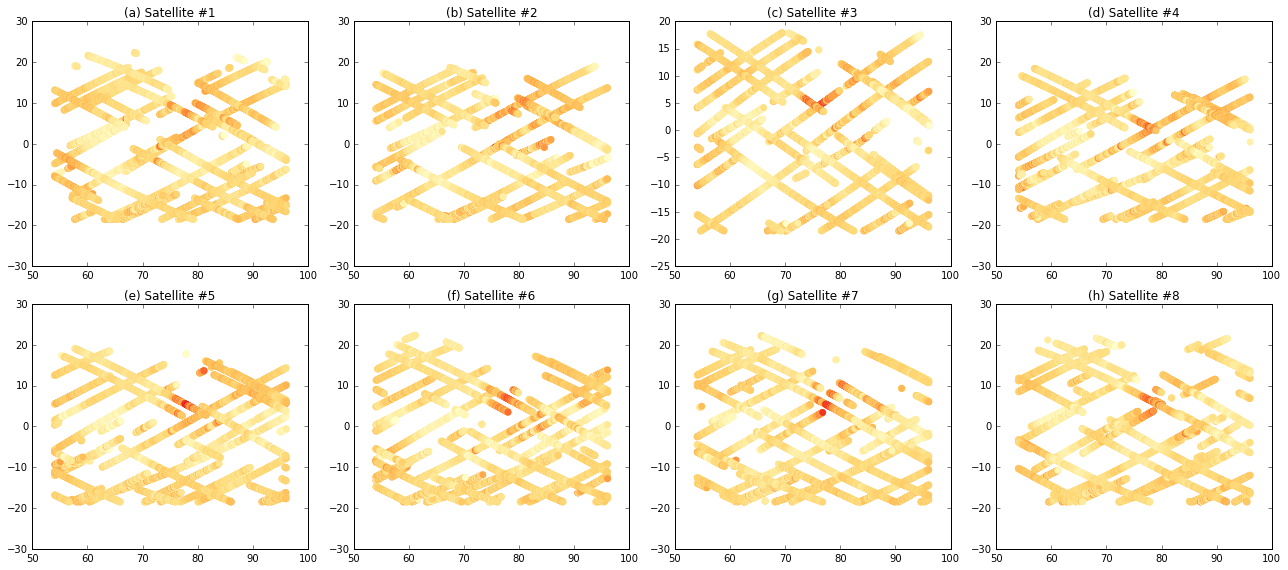

In [24]:
fig = plt.figure(figsize=(18,8))
dis = []
for i, sat in enumerate(merged_data.satellites):  
    dis.append(pygnss.CygnssL2WindDisplay(sat))
ax = fig.add_subplot(241)
dis[0].specular_plot(title='(a) Satellite #1')
ax = fig.add_subplot(242)
dis[1].specular_plot(title='(b) Satellite #2')
ax = fig.add_subplot(243)
dis[2].specular_plot(title='(c) Satellite #3')
ax = fig.add_subplot(244)
dis[3].specular_plot(title='(d) Satellite #4')
ax = fig.add_subplot(245)
dis[4].specular_plot(title='(e) Satellite #5')
ax = fig.add_subplot(246)
dis[5].specular_plot(title='(f) Satellite #6')
ax = fig.add_subplot(247)
dis[6].specular_plot(title='(g) Satellite #7')
ax = fig.add_subplot(248)
dis[7].specular_plot(title='(h) Satellite #8')
plt.tight_layout()

### Data Investigation

In this section I just show some uncommented examples of how to investigate the L2 wind data and input wind data within the pygnss framework.

###### L2 Wind Data Examples

In [25]:
print(np.shape(merged_data.WindSpeed[1100:1300][:]))
cond = merged_data.WindSpeed[1100:1300][:] >= 0
print(merged_data.WindSpeed[1100:1300][:][cond])

(200, 120)
[]


In [26]:
print(merged_data.satellites[3].RangeCorrectedGain[merged_data.satellites[3].GoodData == 1])

[  0.           0.           0.         ...,  13.52930737  20.22728539
  23.73261642]


In [27]:
cond = merged_data.WindSpeed >= 0
print(merged_data.WindSpeed[cond])
print(merged_data.TruthWindSpeed[cond])

[  7.0156498    6.57197046   8.84980297 ...,  10.39377022   8.75372791
   9.71208382]
[ 7.90488243  7.90488243  7.89258528 ...,  7.05763531  7.07583094
  7.07583094]


In [28]:
print(np.shape(merged_data.Longitude))
indices=[180,240]
print(np.shape(merged_data.Longitude[indices[0]:indices[1]][:]))

(86300, 120)
(60, 120)


###### Input Wind Data Examples

In [29]:
print(input_data.latitude)
print
print(input_data.longitude)

[-18.6465683  -18.55637169 -18.46617508 -18.37598038 -18.28578377
 -18.19558716 -18.10539055 -18.01519585 -17.92499924 -17.83480263
 -17.74460602 -17.65441132 -17.56421471 -17.4740181  -17.38382149
 -17.29362679 -17.20343018 -17.11323357 -17.02303696 -16.93284225
 -16.84264565 -16.75244904 -16.66225243 -16.57205772 -16.48186111
 -16.39166451 -16.3014679  -16.21127319 -16.12107658 -16.03087997
 -15.94068336 -15.85048771 -15.76029205 -15.67009544 -15.57989883
 -15.48970318 -15.39950752 -15.30931091 -15.2191143  -15.12891865
 -15.03872299 -14.94852638 -14.85832977 -14.76813412 -14.67793751
 -14.58774185 -14.49754524 -14.40734959 -14.31715298 -14.22695732
 -14.13676071 -14.0465641  -13.95636845 -13.86617279 -13.77597618
 -13.68577957 -13.59558392 -13.50538826 -13.41519165 -13.32499504
 -13.23479939 -13.14460373 -13.05440712 -12.96421051 -12.87401485
 -12.7838192  -12.69362259 -12.60342598 -12.51323032 -12.42303467
 -12.33283806 -12.24264145 -12.15244579 -12.06225014 -11.97205353
 -11.88185

In [30]:
print(np.max(input_data.latitude), np.min(input_data.latitude))
print(np.max(input_data.longitude), np.min(input_data.longitude))

22.3927 -18.6466
95.9851 54.0149


In [31]:
print(input_data.time, np.shape(input_data.northward_wind))

[ -6.18198876e+10] (1, 456, 467)


In [32]:
print(np.shape(input_data.WindSpeed), np.shape(input_data.longitude),
      np.shape(input_data.latitude))

(1, 456, 467) (467,) (456,)
